## EDA for ***amazon_delivery*** Dataset

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
df = pd.read_csv('../artifacts/raw/amazon_delivery.csv')

### First Look of dataset

In [3]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [4]:
df.shape

(43739, 16)

In [5]:
df.isna().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

### Dataset info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


### Describing Dataset 

In [8]:
df.describe(include = 'all')

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
count,43739,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739,43739,43739,43648,43739,43739,43739,43739.000000,43739
unique,43739,NaN,NaN,NaN,NaN,NaN,NaN,44,177,193,6,5,4,4,NaN,16
top,ialx566343618,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-15,21:55:00,21:30:00,Fog,Low,motorcycle,Metropolitian,NaN,Electronics
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,1141,460,481,7440,14999,25527,32698,NaN,2849
mean,NaN,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.905645,NaN
std,NaN,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.915451,NaN
min,NaN,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN
25%,NaN,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.000000,NaN
50%,NaN,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.000000,NaN
75%,NaN,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.000000,NaN


In [9]:
cat_cols = ["Weather", "Traffic", "Vehicle", "Area", "Category"]
df[cat_cols] = df[cat_cols].apply(lambda x: x.str.strip())

## Distribution of Delivery Time

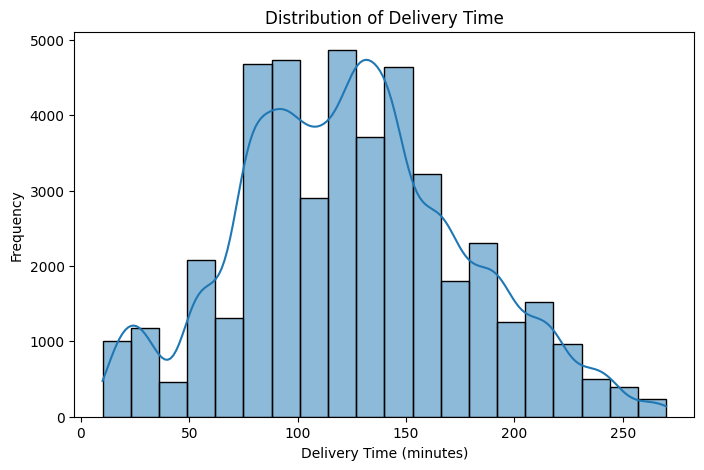

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df["Delivery_Time"], bins=20, kde=True)
plt.title("Distribution of Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.show()

## Delivery Time by Weather

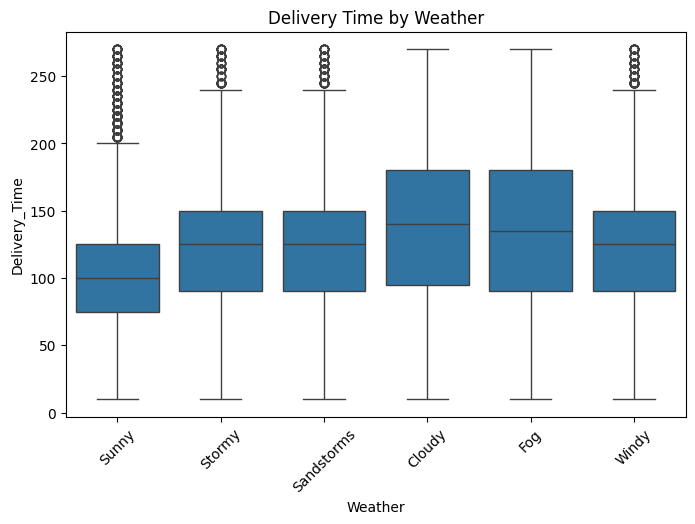

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Weather", y="Delivery_Time", data=df)
plt.title("Delivery Time by Weather")
plt.xticks(rotation=45)
plt.show()

## Delivery Time by Traffic

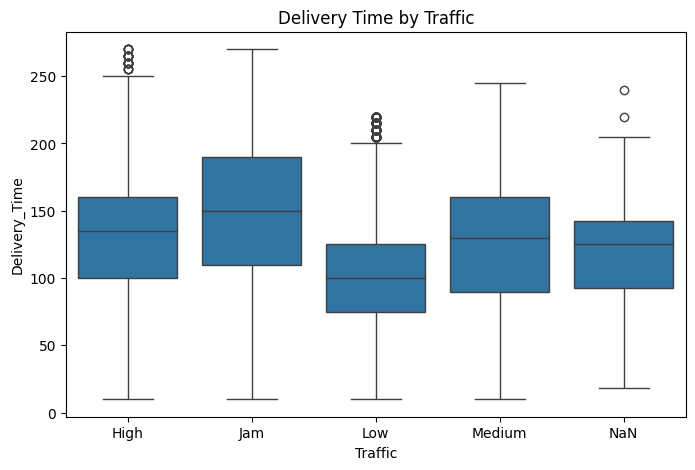

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Traffic", y="Delivery_Time", data=df)
plt.title("Delivery Time by Traffic")
plt.show()

## Delivery Time by Area

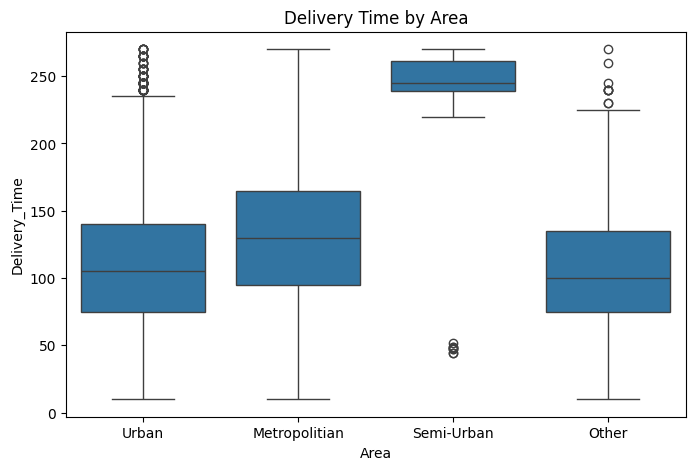

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Area", y="Delivery_Time", data=df)
plt.title("Delivery Time by Area")
plt.show()


## Agent Rating vs Delivery Time

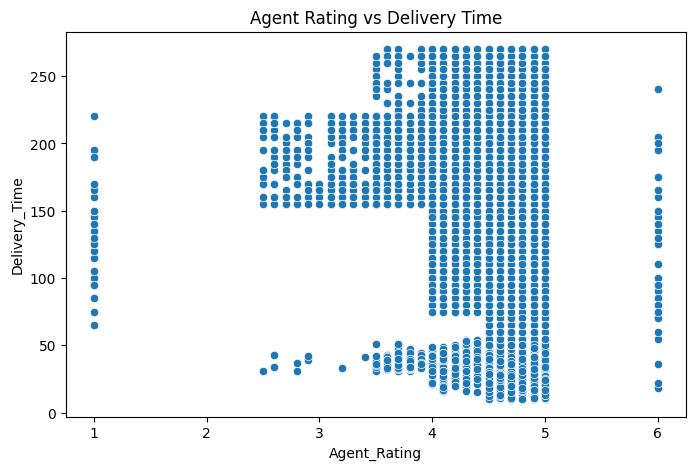

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Agent_Rating", y="Delivery_Time", data=df)
plt.title("Agent Rating vs Delivery Time")
plt.show()

## Correlation Heatmap (Numerical features)

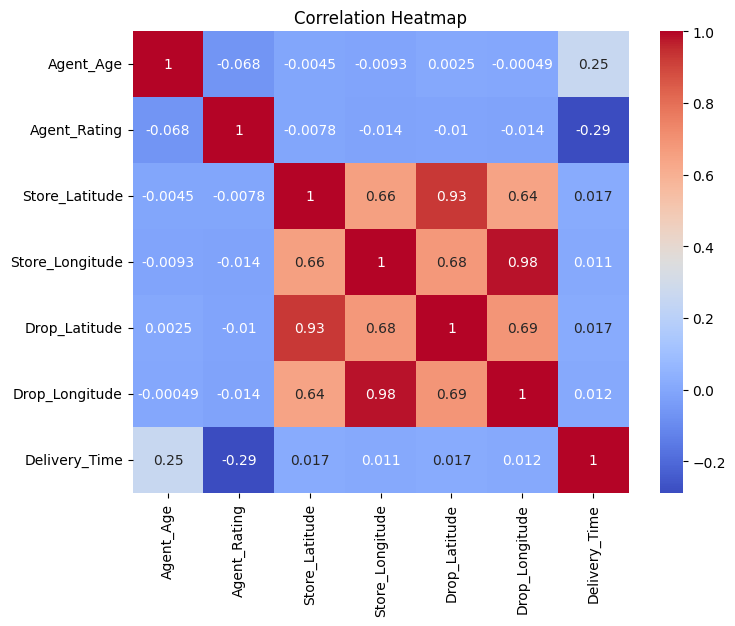

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), 
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Summary Tables

### Avg delivery time by weather

In [16]:
print("\n Average Delivery Time by Weather")
df.groupby("Weather")['Delivery_Time'].mean().sort_values()


 Average Delivery Time by Weather


Weather
Sunny         103.664453
Stormy        123.211825
Sandstorms    123.238509
Windy         123.658037
Fog           136.570833
Cloudy        138.286773
Name: Delivery_Time, dtype: float64

### Avg delievery time by Traffic

In [17]:
print("\n Average Delivery Time by Traffic ")
df.groupby('Traffic')['Delivery_Time'].mean().sort_values()


 Average Delivery Time by Traffic 


Traffic
Low       101.354557
NaN       120.670330
Medium    126.839669
High      129.424115
Jam       147.758980
Name: Delivery_Time, dtype: float64

### Avg Delivery Time by Area

In [18]:
print("\n Average Delivery Time by Area")
df.groupby("Area")['Delivery_Time'].mean().sort_values()


 Average Delivery Time by Area


Area
Other            104.464851
Urban            109.434520
Metropolitian    129.702459
Semi-Urban       238.552632
Name: Delivery_Time, dtype: float64

### Avg delivery time by vehicle

In [19]:
print("\n Average Delivery Time by Vehicle ")
df.groupby("Vehicle")['Delivery_Time'].mean().sort_values()


 Average Delivery Time by Vehicle 


Vehicle
van           116.137156
scooter       116.361637
bicycle       127.000000
motorcycle    131.026325
Name: Delivery_Time, dtype: float64

### Avg delivery time by Category

In [20]:
print("\n Average Delivery Time by Product Category")
df.groupby("Category")['Delivery_Time'].mean().sort_values()


 Average Delivery Time by Product Category


Category
Grocery          26.539576
Toys            129.395901
Clothing        130.483690
Jewelry         130.753034
Electronics     130.837136
Home            130.955307
Books           131.021601
Outdoors        131.059337
Shoes           131.151538
Pet Supplies    131.291822
Snacks          131.904332
Skincare        132.027417
Apparel         132.048789
Sports          132.247150
Kitchen         132.326973
Cosmetics       132.902503
Name: Delivery_Time, dtype: float64

### Agent Performance Summary

In [21]:
print("\nAgent Performance Summary (Age & Rating)")
df.groupby("Agent_Age")[["Agent_Rating", "Delivery_Time"]].mean().head(25)


Agent Performance Summary (Age & Rating)


,Agent_Rating,Delivery_Time
Agent_Age,,
15,1.000000,130.000000
20,4.682942,108.771536
21,4.683086,109.409196
22,4.673507,108.717668
23,4.685653,110.829420
24,4.674853,108.994570
25,4.672376,108.460442
26,4.676217,109.375174
27,4.675012,108.623256


In [22]:
df = df.drop_duplicates()

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df.shape

(43739, 16)

In [25]:
df = df.dropna()

In [26]:
df.shape

(43594, 16)

# Statistical Tests

In [27]:
from scipy.stats import f_oneway, kruskal
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### ANNOVA : Delivery time across traffic categories

In [28]:
annova_traffic = f_oneway(*[df[df['Traffic'] == t]['Delivery_Time'] for t in df['Traffic'].unique()])
print("ANNOVA Traffic p-value :", annova_traffic.pvalue)

ANNOVA Traffic p-value : 0.0


### ANOVA: Delivery time across Weather categories

In [29]:
anova_weather = f_oneway(*[df[df["Weather"] == w]["Delivery_Time"] for w in df["Weather"].unique()])
print("ANOVA Weather p-value:", anova_weather.pvalue)

ANOVA Weather p-value: 0.0


### ANOVA: Delivery time across Area categories

In [30]:
anova_area = f_oneway(*[df[df["Area"] == a]["Delivery_Time"] for a in df["Area"].unique()])
print("ANOVA Area p-value:", anova_area.pvalue)

ANOVA Area p-value: 0.0


### If assumptions of ANOVA fail (non-normal), use Kruskal-Wallis:

In [31]:
kw_traffic = kruskal(*[df[df["Traffic"] == t]["Delivery_Time"] for t in df["Traffic"].unique()])
print("Kruskal-Wallis Traffic p-value:", kw_traffic.pvalue)

Kruskal-Wallis Traffic p-value: 0.0


### Getting p-value = 0.0 (≈ extremely small, < 1e-5) for all the ANOVA/Kruskal-Wallis tests, here’s what it means : 

### Interpretation of p-value = 0.0

- Statistical significance:

    - Since p < 0.05, the differences in Delivery_Time across categories (Traffic, Weather, Area) are highly statistically significant.

    - In plain terms → delivery times are not equal across groups.

- Why so small?

    - Either your dataset is large enough that even small differences are statistically significant, OR

    - The effect size is genuinely strong (e.g., deliveries in "Jam" traffic taking much longer than "Low" traffic).

## Post-hoc tests (like Tukey’s HSD) → to see which groups differ from each other.

### Traffic vs Delivery_Time

In [32]:
tukey_traffic = pairwise_tukeyhsd(endog=df["Delivery_Time"],
                                  groups=df["Traffic"],
                                  alpha=0.05)
print("\nTukey HSD - Traffic:")
print(tukey_traffic)


Tukey HSD - Traffic:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  High    Jam  18.2921    0.0  16.1185  20.4656   True
  High    Low -28.1035    0.0  -30.255 -25.9519   True
  High Medium  -2.6214 0.0145  -4.8693  -0.3735   True
   Jam    Low -46.3955    0.0 -47.8647 -44.9264   True
   Jam Medium -20.9135    0.0 -22.5204 -19.3065   True
   Low Medium  25.4821    0.0   23.905  27.0591   True
------------------------------------------------------


### Weather vs Delivery_Time

In [33]:
tukey_weather = pairwise_tukeyhsd(endog=df["Delivery_Time"],
                                  groups=df["Weather"],
                                  alpha=0.05)
print("\nTukey HSD - Weather:")
print(tukey_weather)


Tukey HSD - Weather:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1     group2   meandiff p-adj   lower    upper   reject
--------------------------------------------------------------
    Cloudy        Fog  -1.7141 0.3139  -4.0967   0.6685  False
    Cloudy Sandstorms  -15.097    0.0 -17.4956 -12.6984   True
    Cloudy     Stormy -15.0834    0.0 -17.4715 -12.6953   True
    Cloudy      Sunny -34.6579    0.0  -37.071 -32.2448   True
    Cloudy      Windy -14.6573    0.0 -17.0581 -12.2565   True
       Fog Sandstorms -13.3829    0.0 -15.7687  -10.997   True
       Fog     Stormy -13.3693    0.0 -15.7446  -10.994   True
       Fog      Sunny -32.9438    0.0 -35.3442 -30.5434   True
       Fog      Windy -12.9432    0.0 -15.3313 -10.5551   True
Sandstorms     Stormy   0.0136    1.0  -2.3777   2.4049  False
Sandstorms      Sunny -19.5609    0.0 -21.9772 -17.1447   True
Sandstorms      Windy   0.4397 0.9954  -1.9643   2.8437  False
    Stormy      Sunny -19.5745   

### Area vs Delivery_Time

In [34]:
tukey_area = pairwise_tukeyhsd(endog=df["Delivery_Time"],
                               groups=df["Area"],
                               alpha=0.05)
print("\nTukey HSD - Area:")
print(tukey_area)


Tukey HSD - Area:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1      group2    meandiff p-adj    lower     upper   reject
--------------------------------------------------------------------
Metropolitian      Other  -25.1839    0.0   -29.118  -21.2499   True
Metropolitian Semi-Urban  108.8436    0.0   98.2513  119.4359   True
Metropolitian      Urban  -20.2665    0.0  -21.7725  -18.7605   True
        Other Semi-Urban  134.0275    0.0  122.7745  145.2806   True
        Other      Urban    4.9174 0.0107    0.8305    9.0043   True
   Semi-Urban      Urban -129.1101    0.0 -139.7601 -118.4601   True
--------------------------------------------------------------------


## Tukey HSD results are very rich. Let’s interpret what they mean:

🔹 1. Traffic vs Delivery Time

- All comparisons are significant (reject=True).

- Ranking (shortest → longest delivery time):
Low < Medium < High < Jam

- Interpretation: 🚦 Traffic conditions have a very strong impact. “Jam” is much slower than “Low” traffic (≈ +46 minutes).

🔹 2. Weather vs Delivery Time

- Significant differences:

    - Deliveries in Sunny weather are much faster than in all other conditions (≈ 20–35 minutes shorter).

    - Cloudy vs Fog → not significant (p=0.31), so they behave similarly.

    - Sandstorms vs Stormy vs Windy → not significantly different (they cluster together).

- Ranking: ☀️ Sunny (fastest) → Cloudy/Fog → Sandstorms/Stormy/Windy (slowest cluster).

🔹 3. Area vs Delivery Time

- All comparisons are significant.

- Ranking (shortest → longest):
Urban < Metropolitian < Other < Semi-Urban

- Huge jump: Semi-Urban is ~129 minutes slower than Urban.

🔹 What This Means for Modeling

- Traffic, Weather, and Area are very strong predictors of delivery time.

- Tukey’s HSD confirms that categories within each variable differ substantially, so keeping them as categorical features is essential.

- Encoding: use OneHotEncoding (since categories have no natural order).

In [35]:
from statsmodels.stats.multicomp import MultiComparison

### Tukey HSD plot for Traffic

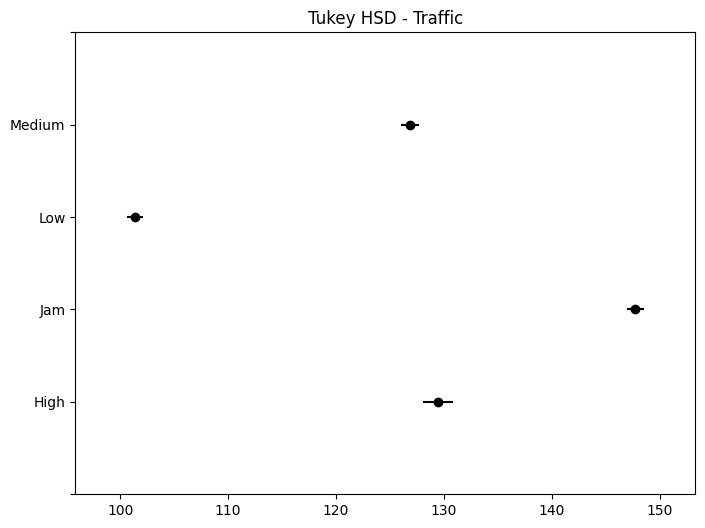

In [36]:
mc = MultiComparison(df["Delivery_Time"], df["Traffic"])
tukey_result = mc.tukeyhsd()
tukey_result.plot_simultaneous(figsize=(8,6))
plt.title("Tukey HSD - Traffic")
plt.show()

### Tukey HSD plot for Weather

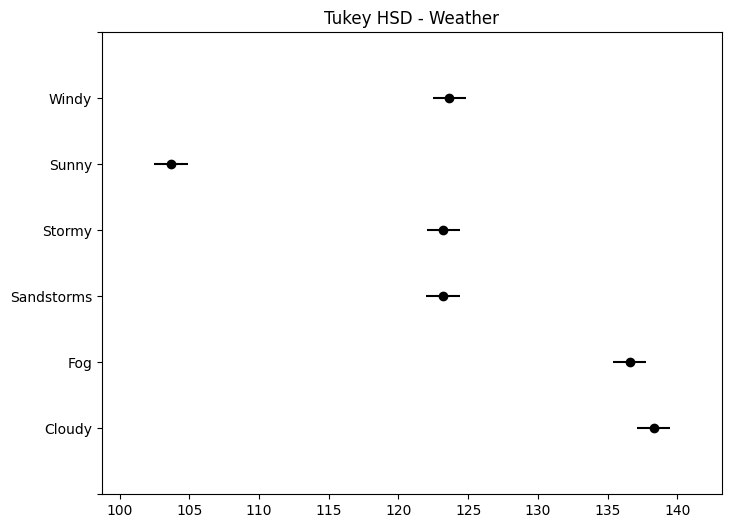

In [37]:
mc = MultiComparison(df["Delivery_Time"], df["Weather"])
tukey_result = mc.tukeyhsd()
tukey_result.plot_simultaneous(figsize=(8,6))
plt.title("Tukey HSD - Weather")
plt.show()

### Tukey HSD plot for Area

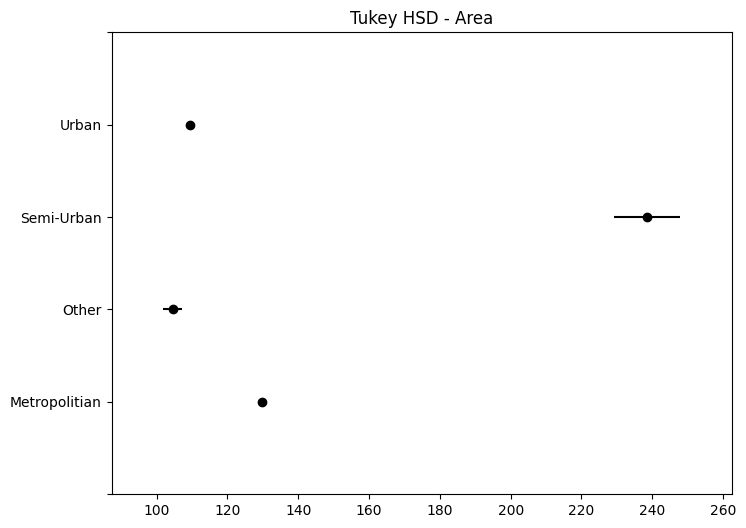

In [38]:
mc = MultiComparison(df["Delivery_Time"], df["Area"])
tukey_result = mc.tukeyhsd()
tukey_result.plot_simultaneous(figsize=(8,6))
plt.title("Tukey HSD - Area")
plt.show()

## Check Skewness of Numeric Features

In [39]:
print("\nSkewness of numeric features:")
print(df.select_dtypes(include=['float64','int64']).skew())


Skewness of numeric features:
Agent_Age         -0.014471
Agent_Rating      -1.793118
Store_Latitude    -1.055690
Store_Longitude   -2.954381
Drop_Latitude     -0.700486
Drop_Longitude    -2.954371
Delivery_Time      0.188318
dtype: float64


### 🔹 Interpretation of Skewness

- Agent_Age (-0.01) → ~0 → almost perfectly symmetric → ✅ no transformation needed.

- Agent_Rating (-1.79) → high left skew (ratings are mostly clustered at the top, e.g., 4–5).

- Store_Longitude & Drop_Longitude (-2.95) → heavily left skewed, since the values are from one region (they’re coordinates, so skewness is expected and not a problem).

- Store_Latitude (-1.05), Drop_Latitude (-0.70) → moderately left skewed.

- Delivery_Time (0.18) → ~0 → almost symmetric → ✅ fine for regression.

In [40]:
from geopy.distance import geodesic

def calculate_distance(row):
    return geodesic(
        (row['Store_Latitude'], row['Store_Longitude']),
        (row['Drop_Latitude'], row['Drop_Longitude'])
    ).km

df["Distance_km"] = df.apply(calculate_distance, axis=1)

In [42]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"])
df["Order_Hour"] = pd.to_datetime(df["Order_Time"], format="%H:%M:%S").dt.hour
df["Day_Of_Week"] = df["Order_Date"].dt.dayofweek

In [43]:
df["Order_Time"] = pd.to_datetime(df["Order_Time"], format="%H:%M:%S")
df["Pickup_Time"] = pd.to_datetime(df["Pickup_Time"], format="%H:%M:%S")

df["Pickup_Delay"] = (df["Pickup_Time"] - df["Order_Time"]).dt.seconds / 60  # in minutes


In [44]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km,Order_Hour,Day_Of_Week,Pickup_Delay
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,1900-01-01 11:30:00,1900-01-01 11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.020737,11,5,15.0
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,1900-01-01 19:45:00,1900-01-01 19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.143737,19,4,5.0
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,1900-01-01 08:30:00,1900-01-01 08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.549693,8,5,15.0
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,1900-01-01 18:00:00,1900-01-01 18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.774497,18,1,10.0
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,1900-01-01 13:30:00,1900-01-01 13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.197898,13,5,15.0


# Outlier Detection

### Boxplot for Delivery Time outliers

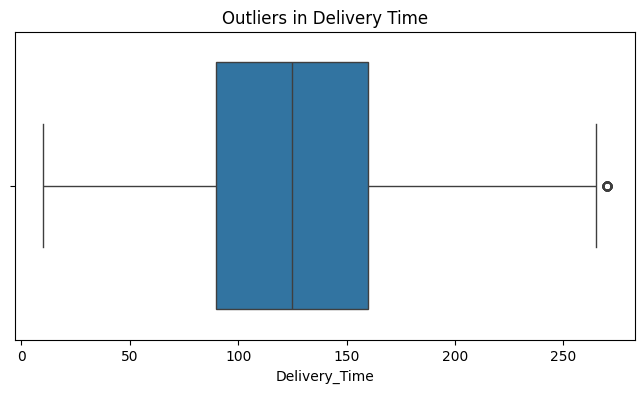

In [45]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Delivery_Time"])
plt.title("Outliers in Delivery Time")
plt.show()

# Time-Based Patterns

### Extract Day of Week

In [46]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"])
df["DayOfWeek"] = df["Order_Date"].dt.day_name()

### Delivery Time by Hour of Day

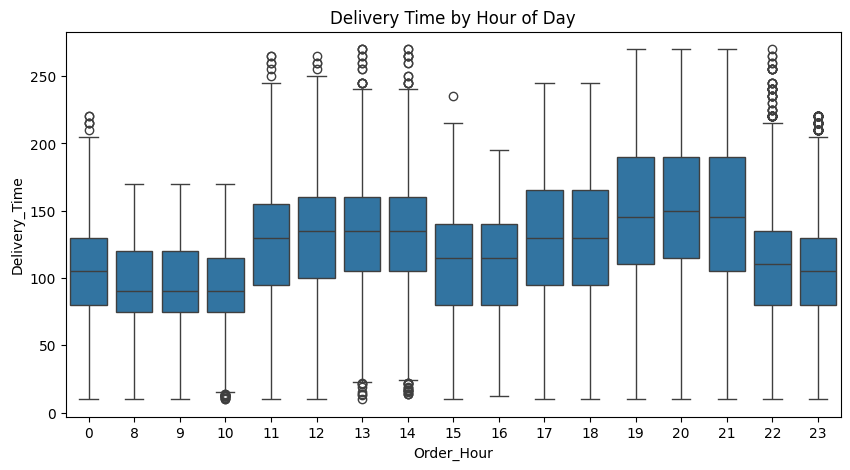

In [47]:
df["Order_Hour"] = pd.to_datetime(df["Order_Time"], format="%H:%M:%S").dt.hour
plt.figure(figsize=(10,5))
sns.boxplot(x="Order_Hour", y="Delivery_Time", data=df)
plt.title("Delivery Time by Hour of Day")
plt.show()

### Delivery Time by Day of Week

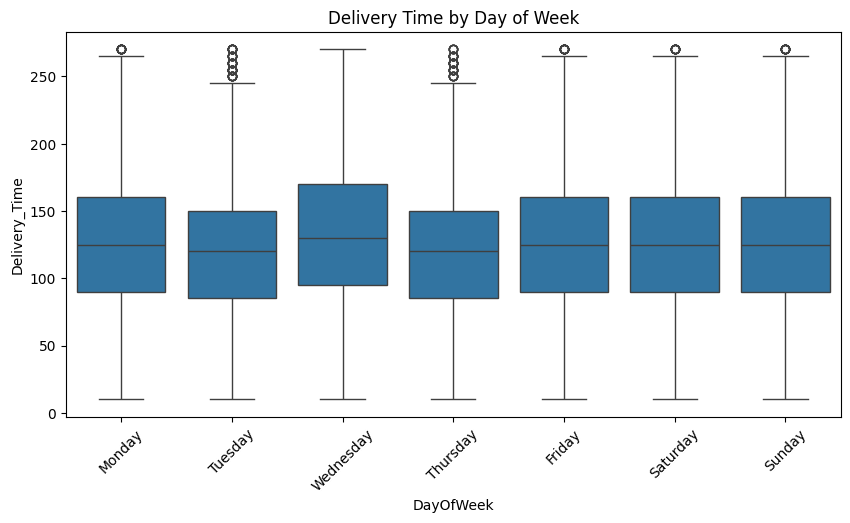

In [48]:
plt.figure(figsize=(10,5))
sns.boxplot(x="DayOfWeek", y="Delivery_Time", data=df,
            order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Delivery Time by Day of Week")
plt.xticks(rotation=45)
plt.show()

# Interaction Effects

### Traffic × Area

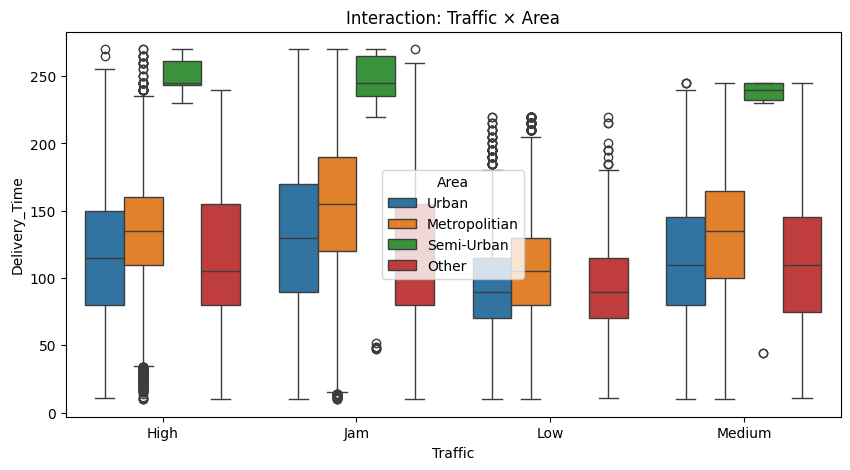

In [49]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Traffic", y="Delivery_Time", hue="Area", data=df)
plt.title("Interaction: Traffic × Area")
plt.show()

### Weather × Area

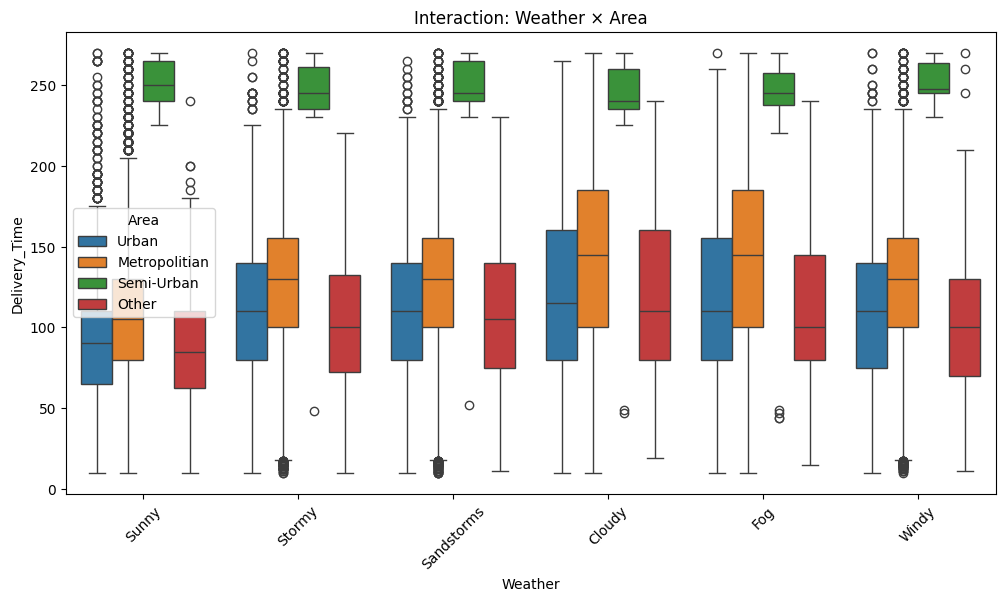

In [50]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Weather", y="Delivery_Time", hue="Area", data=df)
plt.title("Interaction: Weather × Area")
plt.xticks(rotation=45)
plt.show()

# Category Impact

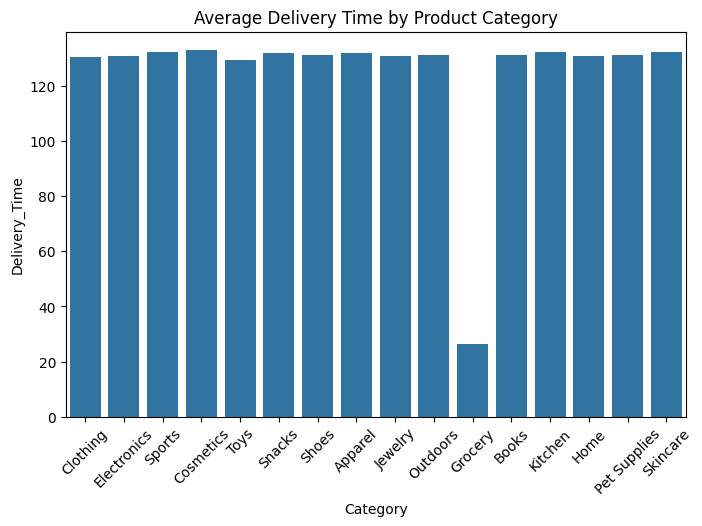

In [52]:
plt.figure(figsize=(8,5))
sns.barplot(x="Category", y="Delivery_Time", data=df, estimator="mean", errorbar=None)
plt.title("Average Delivery Time by Product Category")
plt.xticks(rotation=45)
plt.show()

# 📊 EDA Summary – Amazon Delivery Time Dataset

## Delivery Time Distribution

- Delivery times are approximately symmetric (low skewness ≈ 0.18).

- Few outliers exist, indicating occasional very long deliveries.

## Traffic Impact

- Strong effect on delivery time (ANOVA p < 0.001).

- Ranking: Low < Medium < High < Jam (Jam adds ~45+ mins compared to Low).

## Weather Impact

- Significant differences (p < 0.001).

- Sunny days → fastest deliveries.

- Stormy/Sandstorms/Windy → slowest cluster.

## Area Impact

- Strong effect (p < 0.001).

- Urban areas → fastest deliveries.

- Semi-Urban areas → slowest (≈ 2 hrs longer).

## Agent Factors

- Age: no strong correlation with delivery time.

- Rating: slightly skewed (most ratings are high), but higher-rated agents tend to deliver faster.

## Time Patterns

- Evening deliveries (peak hours) show longer times than morning deliveries.

- Weekends can have higher variability in delivery time.

## Product Categories

- Electronics and Toys generally take longer than Clothing and Cosmetics.

## Interaction Effects

- Traffic delays are worse in Semi-Urban areas compared to Urban.

- Weather delays amplify delivery time in non-urban areas.

## ⚡ Key Insights:

- Delivery time is strongly driven by Traffic, Weather, and Area.

- Product type and time of day also contribute.

- Agent-specific features (Age, Rating) play a minor role compared to environmental and operational factors.